In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import ndjson
import time

In [2]:
# https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/simplified
with open('datasets/quickdraw/{}.ndjson'.format('airplanes')) as f:
    data = ndjson.load(f)

In [3]:
len(data)

151623

In [9]:
sample = data[0]

In [13]:
lines = []
for line in sample['drawing']:
    unique_vertices = list(zip(line[0], line[1]))
    for i in range(len(unique_vertices) - 1):
        lines.append([unique_vertices[i], unique_vertices[i + 1]])
    
lines

[[(167, 140), (109, 194)],
 [(109, 194), (80, 227)],
 [(80, 227), (69, 232)],
 [(69, 232), (58, 229)],
 [(58, 229), (31, 229)],
 [(31, 229), (57, 206)],
 [(57, 206), (117, 124)],
 [(117, 124), (99, 123)],
 [(99, 123), (52, 149)],
 [(52, 149), (30, 157)],
 [(30, 157), (6, 159)],
 [(6, 159), (1, 153)],
 [(1, 153), (2, 110)],
 [(2, 110), (66, 82)],
 [(66, 82), (98, 77)],
 [(98, 77), (253, 74)],
 [(253, 74), (254, 109)],
 [(254, 109), (246, 121)],
 [(246, 121), (182, 127)],
 [(182, 127), (165, 120)],
 [(207, 74), (207, 103)],
 [(207, 103), (210, 114)],
 [(210, 114), (221, 128)],
 [(221, 128), (238, 135)],
 [(119, 72), (107, 41)],
 [(107, 41), (76, 3)],
 [(76, 3), (70, 0)],
 [(70, 0), (49, 1)],
 [(49, 1), (39, 5)],
 [(39, 5), (60, 38)],
 [(60, 38), (93, 70)]]

In [6]:
# unique_vertices = list(zip(strokes_x, strokes_y))
# lines = []
# for i in range(len(unique_vertices) - 1):
#     lines.append([unique_vertices[i], unique_vertices[i + 1]])
# lines

<Figure size 10x10 with 0 Axes>

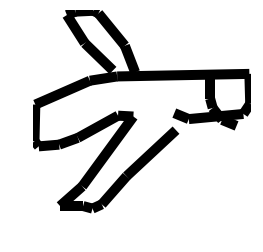

In [16]:
my_dpi = 20
fig = plt.figure(frameon=False, figsize=(10/my_dpi, 10/my_dpi), dpi=my_dpi)

arr = np.zeros((255,255))
fig,ax = plt.subplots(1)

ax.imshow(arr, cmap='binary', aspect='equal')

ax.set_axis_off()
fig.add_axes(ax)

for i, line in enumerate(lines):
    path = Path(line)
    patch = patches.PathPatch(path, lw=10)
    ax.add_patch(patch)
    plt.savefig('airplane/airplane-{}.png'.format(i), pad_inches=0, bbox_inches='tight', dpi=my_dpi)
plt.show()

In [17]:
!mogrify -resize 28x28 airplane/*.png